In [5]:

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

#from library.sb_utils import save_file

### Objective
Create a model to assess the likelihood of a death by heart failure event.
This can be used to help hospitals in assessing the severity of patients with cardiovascular diseases.

## Loading data and exploration

In [7]:
df = pd.read_csv('/Users/gargi/Desktop/DSC_SB/heart_failure/heart_failure_clinical_records_dataset.csv')

In [8]:
df.info

<bound method DataFrame.info of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_

In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
df.shape

(299, 13)

In [11]:
df.index

RangeIndex(start=0, stop=299, step=1)

In [12]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [13]:
df.age.describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

### missing values percent 

In [16]:
missing_percent = df.isnull().sum()*100
missing_percent_by_features = df.isnull().any().sum()*100

In [17]:
missing_percent = missing_percent.sort_values()

In [18]:
missing_percent
missing_percent_by_features

(age                         0
 anaemia                     0
 creatinine_phosphokinase    0
 diabetes                    0
 ejection_fraction           0
 high_blood_pressure         0
 platelets                   0
 serum_creatinine            0
 serum_sodium                0
 sex                         0
 smoking                     0
 time                        0
 DEATH_EVENT                 0
 dtype: int64, 0)

No missing values

## Categorical features

In [27]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

## Review distribution of each feature

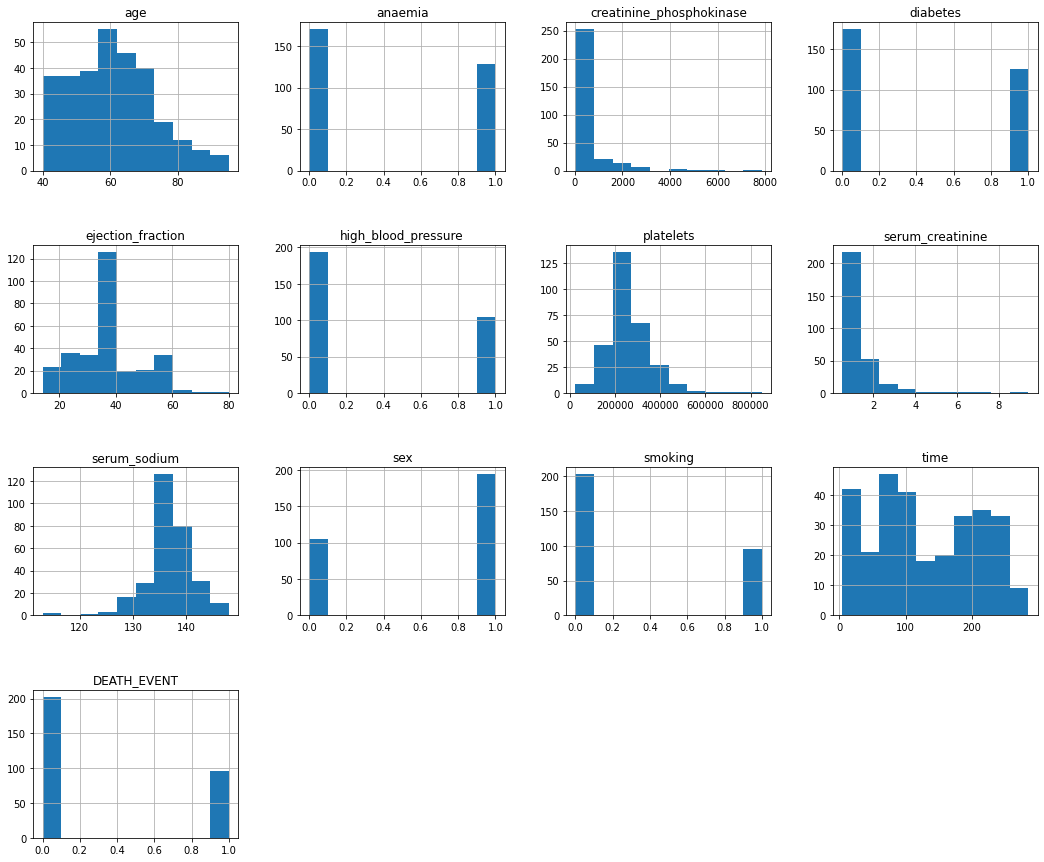

In [32]:
df.hist(figsize=(18, 15))
plt.subplots_adjust(hspace=0.5);

## Distribution of features shows that:
1. age varies form 40 to 99; age distribution can further be studied
as there are two humps visible in the distribution, it is not a single normal distribution. 
changing bins can also help in understanding the distribution better!
2. death_events, sex, smoking, blood pressure, anaemia and diabetes are boolean in nature; meaning they answer in terms of yes or no, 
so a distribution understanding in not needed for them!
3. More information needed for time parameter